In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['ev market in india.csv']))

Saving ev market in india.csv to ev market in india.csv


In [ ]:
data.head(10)

,s.no,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,4,32997
5,5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,5,105000
6,6,Volkswagen,e-Golf,9.6,150,190,168,220,No,FWD,Type 2 CCS,Hatchback,5,31900
7,7,Peugeot,e-208,8.1,150,275,164,420,No,FWD,Type 2 CCS,Hatchback,5,29682
8,8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,5,46380
9,9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,5,55000


In [ ]:
data.columns.tolist()

['s.no',
 'Brand',
 'Model',
 'AccelSec',
 'TopSpeed_KmH',
 'Range_Km',
 'Efficiency_WhKm',
 'FastCharge_KmH',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Seats',
 'PriceEuro']

s.no    ->    Serial Number

Brand   ->    Brand of EV

Model   ->    Model of EV

AccelSec    ->    Accelaration in Seconds

TopSpeed_KmH    ->    Top Speed in KM/H

Range_km    ->    Driving range is the estimated distance one can drive at a given quantity of fuel in the car and the calculated Average fuel economy

Efficiency_WhKm   ->    fuel efficiency shows how far your car can travel with a certain amount of fuel

Power Train   ->    Main components of its powertrain are Engine, Transmission and Driveshaft. Power is generated by the engine and transmitted to the driveshaft.

In [ ]:
df=data.select_dtypes(include=[int,float])
df.set_index('s.no',inplace=True)
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
s.no,,,,,,,
0,4.6,233,450,161,940,5,55480
1,10.0,160,270,167,250,5,30000
2,4.7,210,400,181,620,5,56440
3,6.8,180,360,206,560,5,68040
4,9.5,145,170,168,190,4,32997
...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,5,45000
99,4.5,210,335,258,540,5,96050
100,5.9,200,325,194,440,5,50000


In [ ]:
df1=data.select_dtypes(include=[object])
for i in df1.columns:
  print(df1[i].unique())

['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']
['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe ZE50 R110' 'Cybertruck Tri Motor' 'MX-30 ' 'Leaf e+'
 'UX 300e' 'el-Born ' 'Zoe ZE50 R135' 'EQA ' 'Model S Long Range'
 'Kona Electric 39 kWh' 'e-tron Sportback 55 quattro' 'CITIGOe iV '
 'Mii Electric ' 'e

In [ ]:
data['RapidCharge']=data['RapidCharge'].replace("Yes",1).replace("No",0)
df=pd.concat([df,data['RapidCharge']],axis=1)
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,RapidCharge
0,4.6,233,450,161,940,5,55480,1
1,10.0,160,270,167,250,5,30000,0
2,4.7,210,400,181,620,5,56440,1
3,6.8,180,360,206,560,5,68040,1
4,9.5,145,170,168,190,4,32997,1
...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,5,45000,1
99,4.5,210,335,258,540,5,96050,1
100,5.9,200,325,194,440,5,50000,1
101,5.1,200,375,232,450,5,65000,1


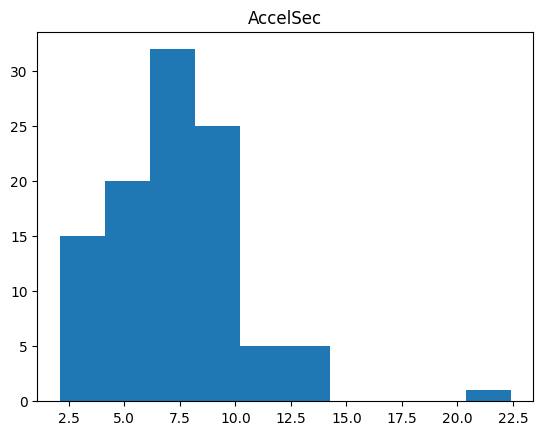

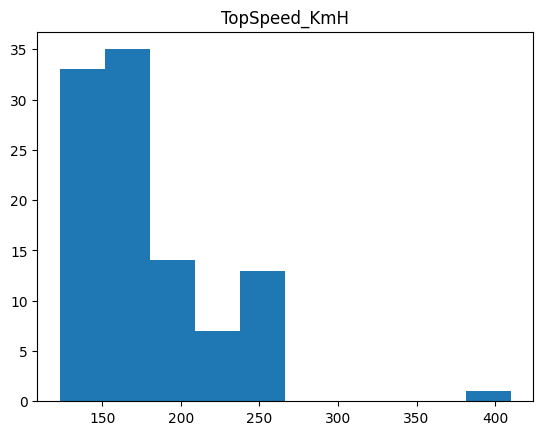

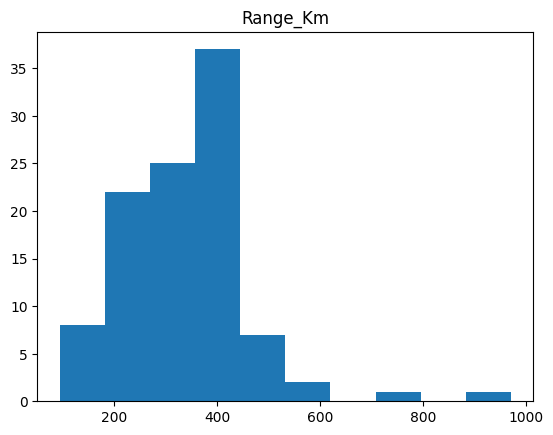

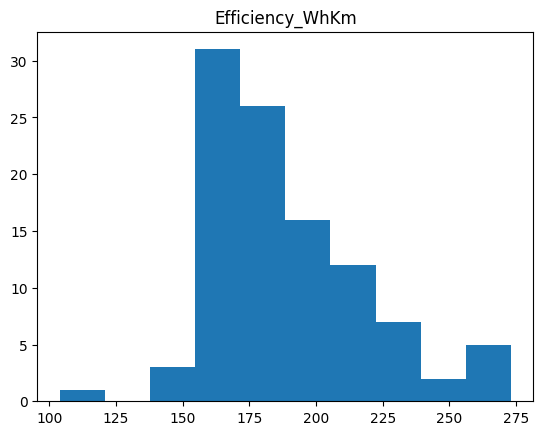

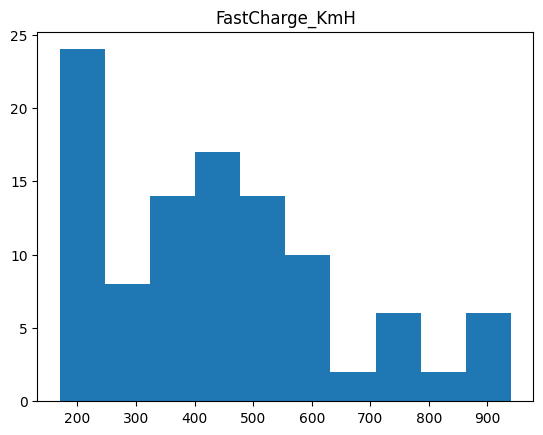

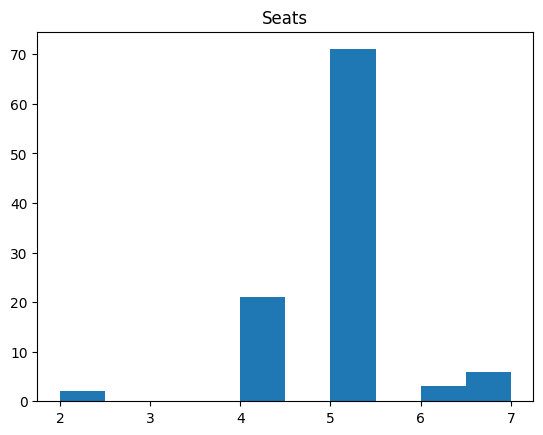

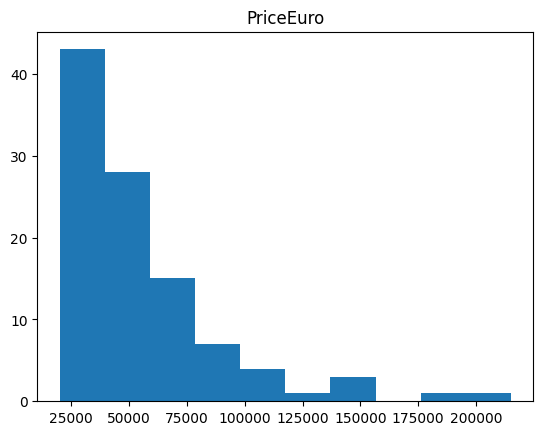

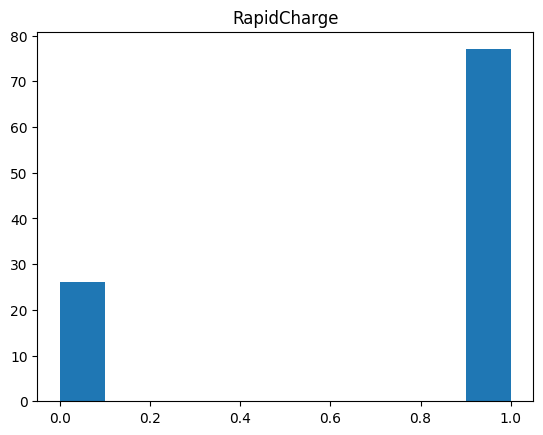

In [ ]:
import matplotlib.pyplot as plt
for i in df.columns:
  plt.hist(df[i])
  plt.title(i)
  plt.show()

In [ ]:
df.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,RapidCharge
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.733559,-0.175335,-0.627174,-0.292518
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.785218,0.126470,0.829057,0.220113
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.723714,0.300163,0.674844,0.251910
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.321925,0.301230,0.396705,0.013894
FastCharge_KmH,-0.733559,0.785218,0.723714,0.321925,1.000000,0.193364,0.667873,0.225863
Seats,-0.175335,0.126470,0.300163,0.301230,0.193364,1.000000,0.020920,0.196721
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.667873,0.020920,1.000000,0.199737
RapidCharge,-0.292518,0.220113,0.251910,0.013894,0.225863,0.196721,0.199737,1.000000


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
MD_pca=pca.fit_transform(df)
MD_p=pca.fit(df)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.785539,0.605603,0.605603
PC2,0.866797,0.142720,0.748323
PC3,0.732372,0.101886,0.850209
PC4,0.592120,0.066599,0.916808
PC5,0.465677,0.041193,0.958000
PC6,0.359093,0.024494,0.982495
PC7,0.303571,0.017505,1.000000


In [ ]:
load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=df.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
AccelSec,0.363,-0.065,-0.032,-0.453,-0.529,-0.473,0.392
TopSpeed_KmH,-0.455,-0.029,-0.184,0.041,0.270,0.012,0.826
Range_Km,-0.396,0.056,-0.144,0.371,-0.795,0.224,-0.010
Efficiency_WhKm,-0.231,-0.435,0.862,0.024,-0.076,-0.053,0.074
FastCharge_KmH,-0.325,0.019,-0.110,0.314,0.094,-0.847,-0.237
PriceEuro,-0.566,-0.134,-0.171,-0.728,-0.017,0.052,-0.314
RapidCharge,-0.156,0.885,0.401,-0.161,-0.021,-0.049,0.050


In [ ]:
from scipy import stats
for i in df.columns:
  IQR = stats.iqr(df[i], interpolation = 'midpoint')
  df[i] = (df[i]-np.median(df[i]))/IQR

In [ ]:
df=df.drop('Seats',axis=1)

In [ ]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 841.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=fb8ab8cbf03d7f20460ad589838aac66154b022d99d1f716d23c47c56cafaaf9
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


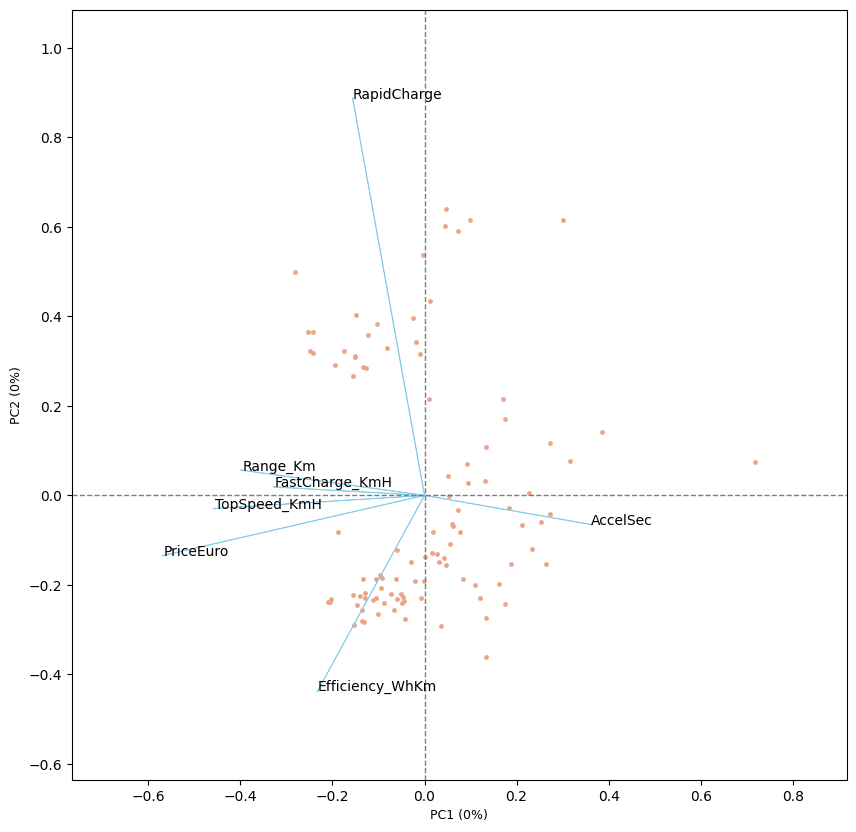

In [ ]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore=MD_pca, loadings=-load, labels=df.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

In [ ]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PriceEuro,RapidCharge
0,-0.692308,1.46,0.733333,-0.542857,1.694915,0.342814,0.0
1,0.692308,0.00,-0.466667,-0.371429,-0.644068,-0.490669,-2.0
2,-0.666667,1.00,0.400000,0.028571,0.610169,0.374217,0.0
3,-0.128205,0.40,0.133333,0.742857,0.406780,0.753668,0.0
4,0.564103,-0.30,-1.133333,-0.342857,-0.847458,-0.392633,0.0
...,...,...,...,...,...,...,...
98,0.051282,0.00,-0.066667,0.314286,0.000000,0.000000,0.0
99,-0.717949,1.00,-0.033333,2.228571,0.338983,1.669911,0.0
100,-0.358974,0.80,-0.100000,0.400000,0.000000,0.163556,0.0
101,-0.564103,0.80,0.233333,1.485714,0.033898,0.654225,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS Value')

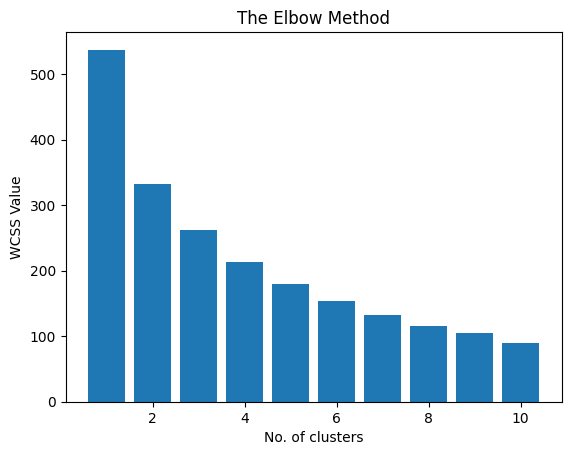

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.bar(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Value')

In [ ]:
#Hyper-Parameter tunning
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans=KMeans(n_clusters=2,init='k-means++',random_state=100)
kmeans_pred1=kmeans.fit_predict(df)

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=100)
kmeans_pred2=kmeans.fit_predict(df)

dbscan=DBSCAN(eps=1)
dbscan_pred1=dbscan.fit_predict(df)

dbscan=DBSCAN(eps=1.5)
dbscan_pred2=dbscan.fit_predict(df)

gmm= GaussianMixture(n_components=2)
gmm_pred1=gmm.fit_predict(df)

gmm= GaussianMixture(n_components=3)
gmm_pred2=gmm.fit_predict(df)

pred_list=[kmeans_pred1,kmeans_pred2,dbscan_pred1,dbscan_pred2,gmm_pred1,gmm_pred2]

for i in pred_list:
  b=silhouette_score(df,i, metric='euclidean')
  print(f"The accuracy value is {b}")

The accuracy value is 0.34563752048195606
The accuracy value is 0.3067639464879734
The accuracy value is 0.26644461132910957
The accuracy value is 0.26953035348020804
The accuracy value is 0.3462958185870854
The accuracy value is 0.31012785681506744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
final_df=data.select_dtypes(include=[int,float])

In [ ]:
final_df=pd.concat([final_df,gmm_predict],axis=1)
final_df

,s.no,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,0
0,0,4.6,233,450,161,940,1,5,55480,1
1,1,10.0,160,270,167,250,0,5,30000,0
2,2,4.7,210,400,181,620,1,5,56440,1
3,3,6.8,180,360,206,560,1,5,68040,1
4,4,9.5,145,170,168,190,1,4,32997,0
...,...,...,...,...,...,...,...,...,...,...
98,98,7.5,160,330,191,440,1,5,45000,0
99,99,4.5,210,335,258,540,1,5,96050,1
100,100,5.9,200,325,194,440,1,5,50000,1
101,101,5.1,200,375,232,450,1,5,65000,1


In [ ]:
final_df.rename(columns = {0:'Predicted value'}, inplace = True)

In [ ]:
final_df.groupby(by=["Predicted value"]).median()

,s.no,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro
Predicted value,,,,,,,,,
0,52.0,8.2,157.0,275.0,175.0,340.0,1.0,5.0,36837.0
1,50.5,4.6,210.0,390.0,213.0,615.0,1.0,5.0,75175.5


In [ ]:
data=pd.concat([data,gmm_predict],axis=1)
data.rename(columns = {0:'Predicted value'}, inplace = True)
data

,s.no,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Predicted value
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,5,55480,1
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,5,30000,0
2,2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,5,56440,1
3,3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,5,68040,1
4,4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,4,32997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,FWD,Type 2 CCS,Hatchback,5,45000,0
99,99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,AWD,Type 2 CCS,SUV,5,96050,1
100,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,AWD,Type 2 CCS,Hatchback,5,50000,1
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,AWD,Type 2 CCS,Hatchback,5,65000,1


In [2]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
data2 = pd.read_csv(io.BytesIO(uploaded['EV_Data.csv']))

Saving EV_Data.csv to EV_Data.csv


In [4]:
import numpy as np
data2['Annual Income']=np.round(data2['Annual Income'],2)

In [5]:
data2.head(3)

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.65,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.40,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.11,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"


Text(0, 0.5, 'Age')

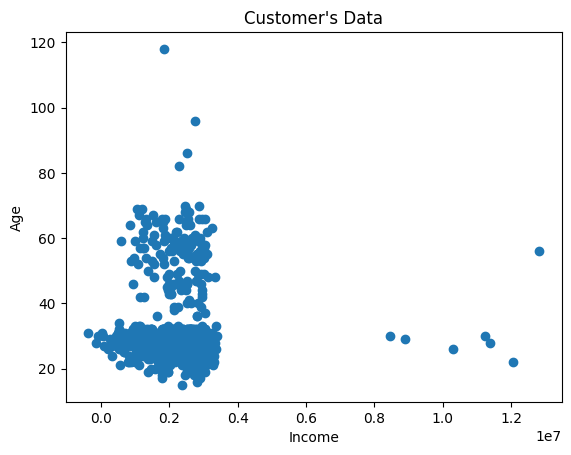

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data2['Annual Income'],data2['Age'])
plt.title("Customer's Data")
plt.xlabel("Income")
plt.ylabel("Age")

In [9]:
data2.describe(include=['O'])

,City,Profession,Marital Status,Education,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Do you think Electronic vehicles will replace fuel cars in India?
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,35,4,2,2,3,5,3,16,8,4
top,Pune,None,Single,Graduate,Yes,SUV,Yes,Tata,<15 lakhs,"Yes, in <10 years"
freq,570,460,638,693,663,467,768,186,483,419


In [17]:
data2=data2.iloc[:,[1,7]]
data2

,Age,Annual Income
0,30,1193875.65
1,27,1844540.40
2,32,2948150.11
3,55,2832379.74
4,26,2638750.58
...,...,...
995,31,2110722.12
996,29,1616287.71
997,30,2202829.03
998,24,1764744.07


In [18]:
from scipy import stats
for i in data2.columns:
  IQR = stats.iqr(data2[i], interpolation = 'midpoint')
  data2[i] = (data2[i]-np.median(data2[i]))/IQR
data2

<ipython-input-18-bbeddcc7c975>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i] = (data2[i]-np.median(data2[i]))/IQR


,Age,Annual Income
0,0.2,-1.168032
1,-0.4,-0.498650
2,0.6,0.636708
3,5.2,0.517607
4,-0.6,0.318408
...,...,...
995,0.4,-0.224811
996,0.0,-0.733469
997,0.2,-0.130054
998,-1.0,-0.580742


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS Value')

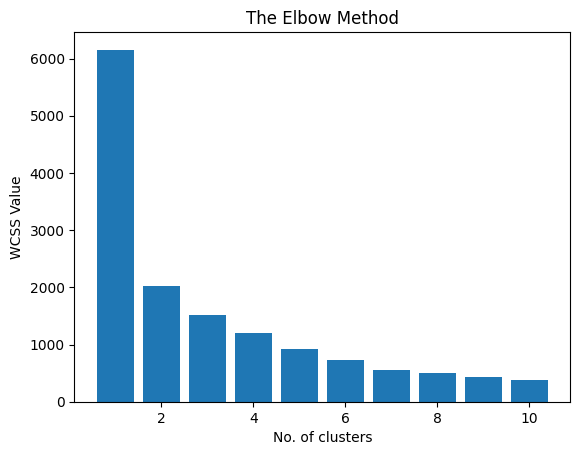

In [20]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=100)
  kmeans.fit(data2)
  wcss.append(kmeans.inertia_)

plt.bar(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Value')

In [38]:
#Hyper-Parameter tunning
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans=KMeans(n_clusters=2,init='k-means++',random_state=100)
kmeans_pred1=kmeans.fit_predict(data2)

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=100)
kmeans_pred2=kmeans.fit_predict(data2)

dbscan=DBSCAN(eps=0.5)
dbscan_pred1=dbscan.fit_predict(data2)

dbscan=DBSCAN(eps=0.75)
dbscan_pred2=dbscan.fit_predict(data2)

gmm= GaussianMixture(n_components=2)
gmm_pred1=gmm.fit_predict(data2)

gmm= GaussianMixture(n_components=3)
gmm_pred2=gmm.fit_predict(data2)

pred_list=[kmeans_pred1,kmeans_pred2,dbscan_pred1,dbscan_pred2,gmm_pred1,gmm_pred2]

for i in pred_list:
  b=silhouette_score(data2,i, metric='euclidean')
  print(f"The accuracy value is {b}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The accuracy value is 0.7503980172558861
The accuracy value is 0.7605147424484158
The accuracy value is 0.6182812371371781
The accuracy value is 0.7397638528783268
The accuracy value is 0.7380038893969065
The accuracy value is 0.36868047387738434


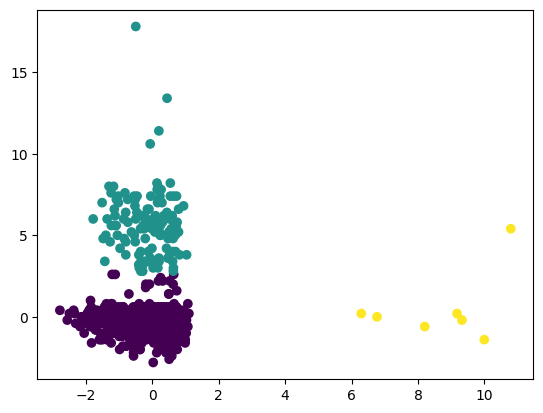

In [46]:
plt.scatter(data2['Annual Income'],data2['Age'],c=kmeans_pred2)